# Project 3 - Diabetes Detection

by 23AIML056 Kavya

## Prerequisites

In [92]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

In [93]:
# Loading the dataset

df = pd.read_csv("D:\\Datasets\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
# Statistics of the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Conclusion:

the BMI, SkinThikness, Glucose, Insulin, BloodPressure cannot be zero - so those must be null values

## Visualisation

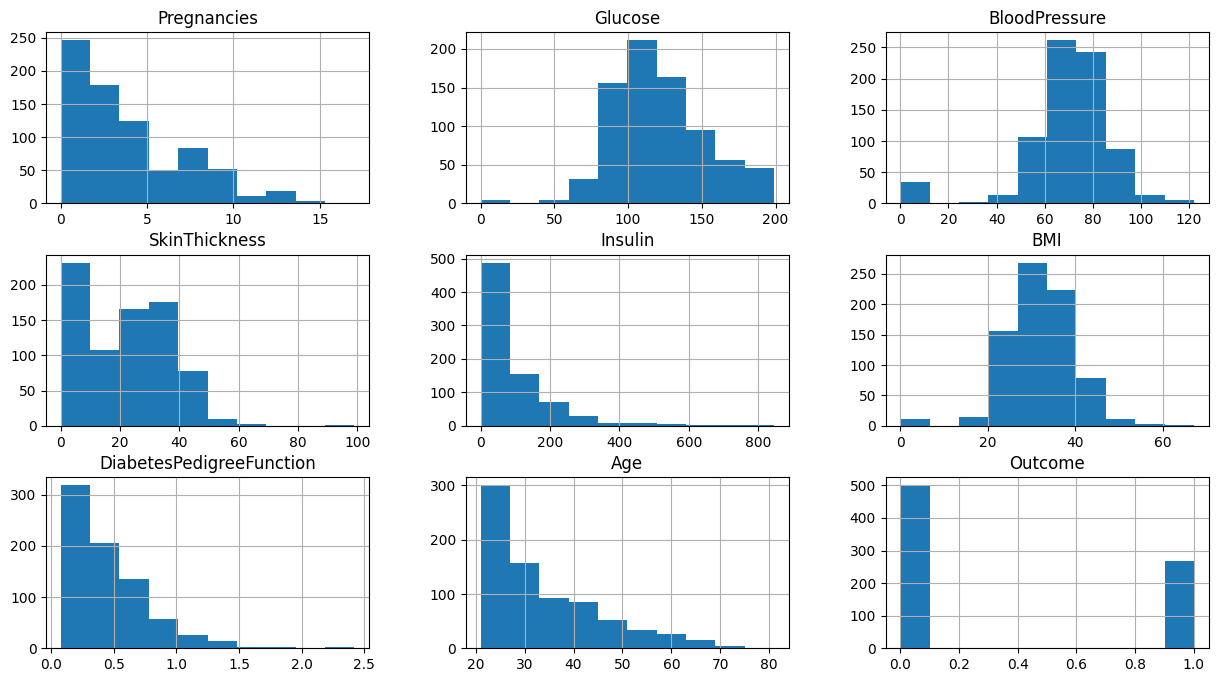

In [96]:
# Distribution of all variables

hist = df.hist(figsize=(15,8))

## Data Cleaning

In [97]:
# Making a copy of the DataFrame so that we can manipulate it without affecting the original data

df_copy = df.copy(deep=True)

In [98]:
# Replacing zero values in specific columns with the median of those columns

zero_cols = ["Glucose", "Insulin", "BMI", "BloodPressure", "SkinThickness"]

for col in zero_cols:
    median = df_copy[col].median()
    df_copy[col] = df_copy[col].replace(0, median)

df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


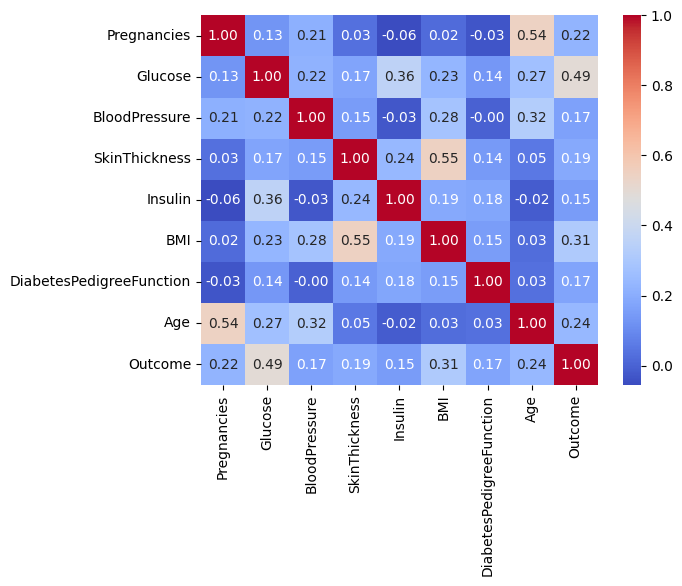

In [99]:
# Heatmap to visualize the correlation between features

sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Conclusion:

All variables have very good correlation with each other so we cannot remove any of the features.

## Machine learning

In [100]:
# Splitting the dataset into features and target variable

X = df_copy.drop('Outcome', axis = 1) # Features
y = df_copy['Outcome'] # Target variable

In [101]:
# Standardizing the features

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [102]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y, test_size=0.2, random_state=42, stratify=y
)

In [103]:
# Resampling the training data using SMOTE

smote = SMOTE(random_state=42)
X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)

In [104]:
# Validate the resampling

y_train_rs.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

In [105]:
# Gather training and test accuracies for k from 1 to 20

training_accuracies = []
test_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rs, y_train_rs)
    
    training_accuracy = knn.score(X_train_rs, y_train_rs)
    test_accuracy = knn.score(X_test, y_test)
    
    training_accuracies.append(training_accuracy)
    test_accuracies.append(test_accuracy)

In [106]:
# Find out the index of the maximum test and training accuracy

max_training_accuracy_index = np.argmax(training_accuracies)
print(f"Maximum Training Accuracy: {training_accuracies[max_training_accuracy_index]} at k={max_training_accuracy_index + 1}")

max_test_accuracy_index = np.argmax(test_accuracies)
print(f"Maximum Test Accuracy: {test_accuracies[max_test_accuracy_index]} at k={max_test_accuracy_index + 1}")

Maximum Training Accuracy: 1.0 at k=1
Maximum Test Accuracy: 0.7402597402597403 at k=5


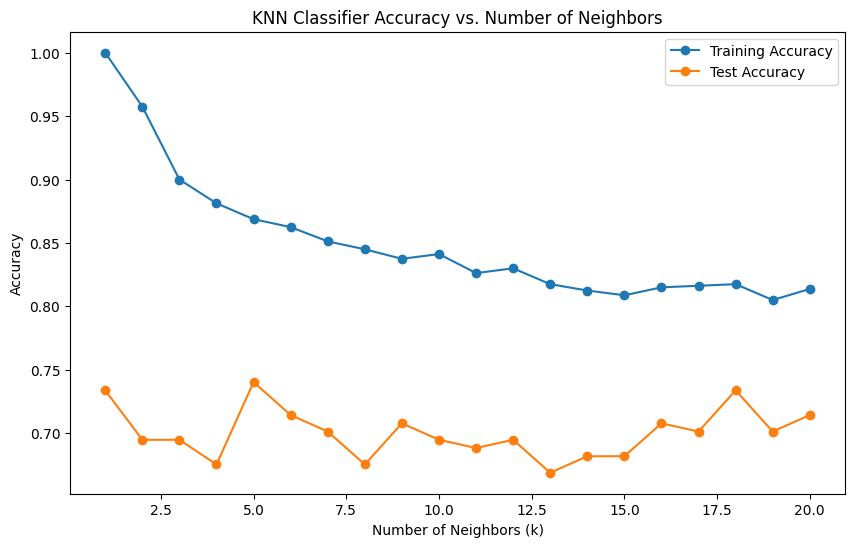

In [107]:
# Plotting the accuracies

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), training_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), test_accuracies, label='Test Accuracy', marker='o')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [108]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_rs, y_train_rs)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.60      0.76      0.67        54

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.75       154



### Conclusion:

- The dataset gives best results on 5 negihbours